# Introduction
This project I will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

My goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy in these nations?
5. What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

# Import Python Modules 

In [43]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Loading the Data

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here all_data.csv will be read in into a DataFrame called df, followed by a quick inspection of the DataFrame using .head() to check its contents.

In [44]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Then we can check how many rows and columns are in this data. This data has 96 rows and 4 columns.

In [45]:
df.shape

(96, 4)

# Explore the Data

Next we have to explore more informations about the data. Eg. What are the countries in the data? What are the years represented in the data.


In [46]:
#What are the countries?
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [47]:
#What are the years?
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


##### Cleaning Data

The column name Life expectancy at birth (years) is too long, I will change it too LEABY for easier coding.

In [48]:
df=df.rename({"Life expectancy at birth (years)":"LEABY"},axis="columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Distribution Plot

Next I will use graphs to examine the distribution of GDP and Life Expentancy to see if I can get more insights.


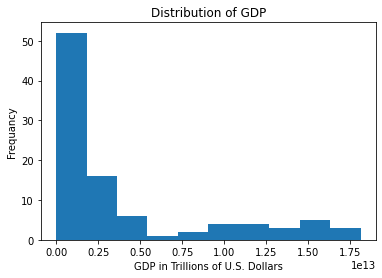

<Figure size 432x288 with 0 Axes>

In [49]:
plt.hist(df.GDP)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel("Frequancy")
plt.title("Distribution of GDP")
plt.show()
plt.clf()

From the distribution plot of GDP, I can see  The distribution of GDP in the data is very right skewed where most of the values are on the left-hand side.

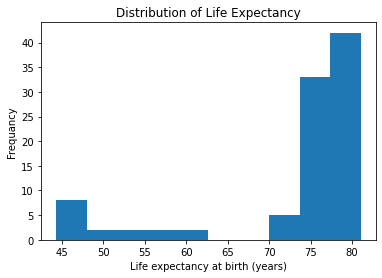

<Figure size 432x288 with 0 Axes>

In [50]:
plt.hist(df.LEABY)
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("Frequancy")
plt.title("Distribution of Life Expectancy")
plt.show()
plt.clf()

The distribution of LEABY in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the GDP column

The above plots did not break up the data by countries, so the next task will be to find the average LEABY and GDP by country.

In [51]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [52]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now that they are broken down by Country and the average values for LEEABY and GDP are created, next I will create bar plots showing the mean values for each variable.

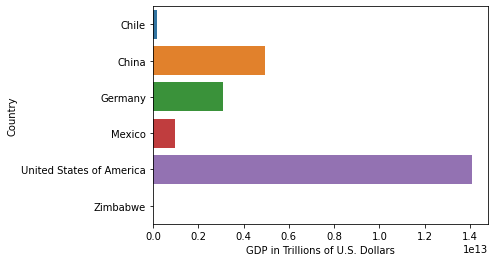

In [53]:
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP in Trillions of U.S. Dollars");

For the average GDP by Country it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

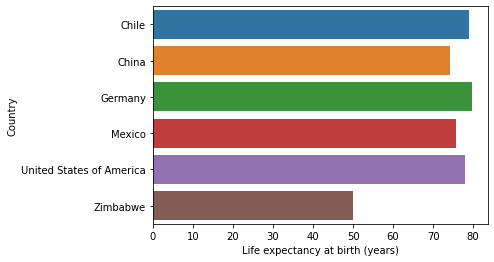

In [54]:
sns.barplot(x="LEABY", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)");

This plot is Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before!

# Line Plot

Next the data will explore GDP and LEABY over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

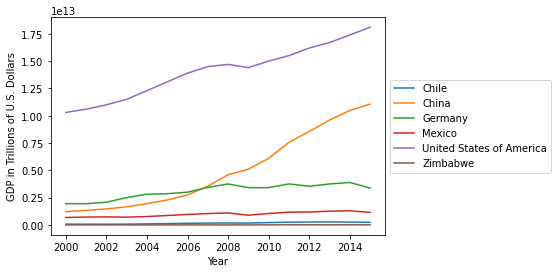

In [55]:
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");


Next line plot shows average life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

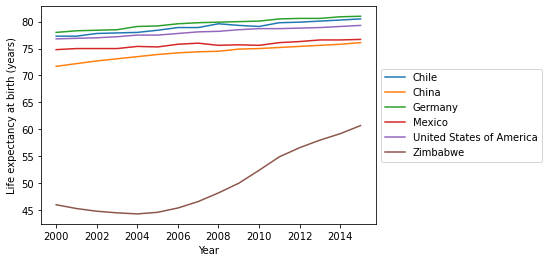

In [56]:
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");


# Scatter Plot

The next two charts will explore the relationship between GDP and LEABY. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy. This shows a positive correlation between GDP and Life expectancy.

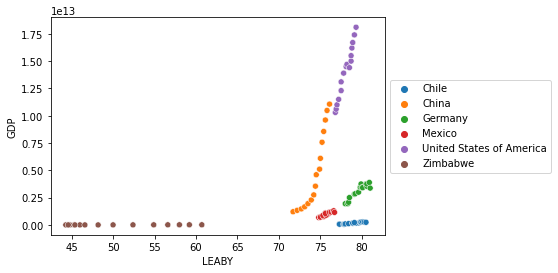

In [57]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Conclusion

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.